In [1]:
# Importing all necessary libraries
import zipfile
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

img_width, img_height = 224, 224

In [2]:
train_data_zip = '/content/train.zip'
validation_data_zip = '/content/test.zip'
train_data_dir = '/tmp/train'
validation_data_dir = '/tmp/test'

with zipfile.ZipFile(train_data_zip, 'r') as zip_ref:
    zip_ref.extractall(train_data_dir)

with zipfile.ZipFile(validation_data_zip, 'r') as zip_ref:
    zip_ref.extractall(validation_data_dir)

nb_train_samples = 400
nb_validation_samples = 100
epochs = 10
batch_size = 16

In [3]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 400 images belonging to 1 classes.
Found 100 images belonging to 1 classes.


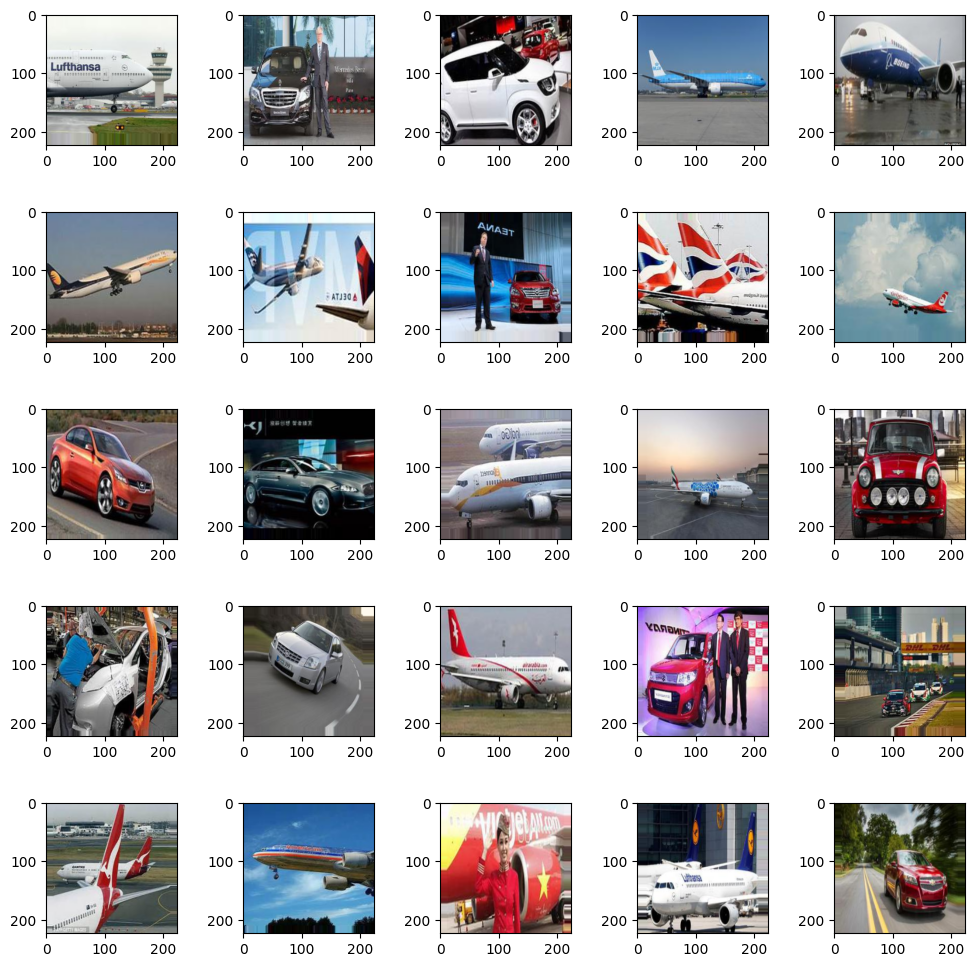

In [5]:
# Displaying 5x5 images
rows, cols = 5, 5
# Create a subplot grid
fig, ax = plt.subplots(rows, cols, figsize=(10, 10))

# Set tight layout
plt.tight_layout()
k = 0

for i in range(rows):
    for j in range(cols):
        ax[i][j].imshow(train_generator[k][0][0])
        k += 1

plt.show()

In [6]:
model = Sequential()
model.add(Conv2D(64, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (2, 2)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [8]:
model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
25/25 [==============================] - 10s 234ms/step - loss: 0.0258 - accuracy: 1.0000 - val_loss: 5.3147e-12 - val_accuracy: 1.0000
Epoch 2/10
25/25 [==============================] - 5s 180ms/step - loss: 1.0442e-14 - accuracy: 1.0000 - val_loss: 5.3147e-12 - val_accuracy: 1.0000
Epoch 3/10
25/25 [==============================] - 5s 204ms/step - loss: 1.1037e-14 - accuracy: 1.0000 - val_loss: 5.3146e-12 - val_accuracy: 1.0000
Epoch 4/10
25/25 [==============================] - 5s 203ms/step - loss: 1.3178e-14 - accuracy: 1.0000 - val_loss: 1.0986e-17 - val_accuracy: 1.0000
Epoch 5/10
25/25 [==============================] - 5s 182ms/step - loss: 1.7343e-14 - accuracy: 1.0000 - val_loss: 5.3147e-12 - val_accuracy: 1.0000
Epoch 6/10
25/25 [==============================] - 6s 235ms/step - loss: 1.1614e-14 - accuracy: 1.0000 - val_loss: 5.3147e-12 - val_accuracy: 1.0000
Epoch 7/10
25/25 [==============================] - 5s 201ms/step - loss: 1.5030e-15 - accuracy: 1.0000

1/1 [==============================] - 0s 252ms/step


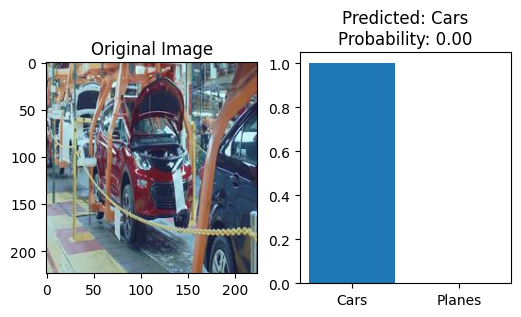

In [9]:
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os

# # Check the contents of the extracted directory
# for root, dirs, files in os.walk(validation_data_dir):
#     for name in files:
#         print(os.path.join(root, name))

image_path = os.path.join(validation_data_dir, '/tmp/test/test/cars/21.jpg')
image = load_img(image_path, target_size=(224, 224))
img = img_to_array(image)
img = img / 255.0
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Predict the label
label = model.predict(img)
predicted_class = 'Cars' if label[0][0] < 0.5 else 'Planes'
probability = label[0][0]

# Plot the image and prediction
plt.figure(figsize=(6, 3))

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(img[0])
plt.title('Original Image')

# Plot the predicted class and probability
plt.subplot(1, 2, 2)
plt.bar(['Cars', 'Planes'], [1 - probability, probability])
plt.title(f'Predicted: {predicted_class}\nProbability: {probability:.2f}')

plt.show()